#**Ventas de Café**



---



El conjunto de datos registra ventas de café, detallando información temporal, métodos de pago y características de las bebidas adquiridas. Incluye variables como la hora numérica del día, tipo de pago, monto gastado, nombre del café comprado, así como la división del día en partes (mañana, tarde), día y mes en formatos abreviados y numéricos, junto con la fecha y hora exacta de cada compra. Esto permite analizar patrones de consumo a lo largo del tiempo y según diferentes categorías.

##Varibles del set de datos

**hour_of_day:** Hora del día en formato numérico (por ejemplo, 10 para las 10 a.m., 12 para las 12 p.m.).

**cash_type:** Tipo de pago usado (por ejemplo, tarjeta "card").

**money:** Cantidad de dinero gastada en la compra.

**coffee_name:** Nombre del tipo de café o bebida adquirida (por ejemplo, Latte, Hot Chocolate).

**Time_of_Day:** Parte del día en la que se realizó la compra (por ejemplo, Morning, Afternoon).

**Weekday:** Día de la semana en forma abreviada (por ejemplo, Fri para viernes).

**Month_name:** Nombre del mes en abreviatura (por ejemplo, Mar para marzo).

**Weekdaysort:** Número que representa el día de la semana (posiblemente 1 para lunes, 5 para viernes, etc.).

**Monthsort:** Número que representa el mes (por ejemplo, 3 para marzo).

**DateTime:** Fecha completa de la compra en formato año-mes-día.

**Time:** Hora exacta y fracción de tiempo en que se realizó la compra.

In [2]:
#Importar librerías
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files

In [5]:
#Cargar archivo
uploaded = files.upload()




Saving Coffe_sales.csv to Coffe_sales.csv


In [6]:

#Lectura del archivo
df_coffe = pd.read_csv(io.BytesIO(uploaded['Coffe_sales.csv']))


In [7]:
df_coffe.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [8]:
df_coffe.shape

(3547, 11)

In [9]:
df_coffe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [10]:
df_coffe.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [11]:
df_coffe.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

##**Análisis Exploratorio de Datos**


**¿Cuáles son las horas del día con mayor cantidad de transacciones?**

In [19]:
#Cálculo de las horas con mayor número de transacciones.
transacciones_por_hora = df_coffe.groupby('hour_of_day').size()
# Convertir Series a DataFrame
transacciones_por_hora = transacciones_por_hora.to_frame(name="Cantidad")
transacciones_por_hora_asc = transacciones_por_hora.sort_values(by="Cantidad", ascending=False)
print("\nCantidad de transacciones por hora:\n")
transacciones_por_hora_asc.head()


Cantidad de transacciones por hora:



,Cantidad
hour_of_day,
10,328
11,283
16,278
9,242
12,241


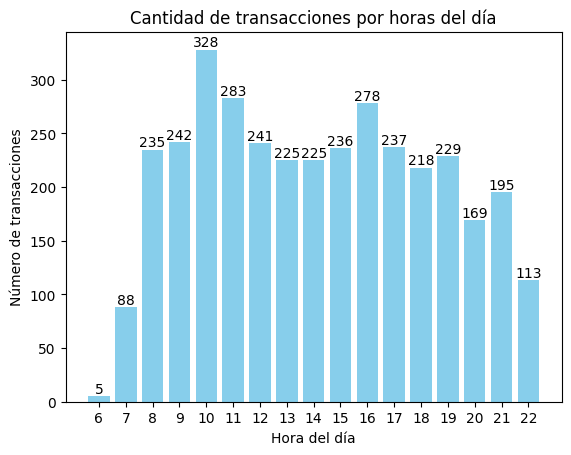

In [16]:
#Gráfico de barras de cantidad de transacciones por horas del día.
fig, ax = plt.subplots()
bars = ax.bar(transacciones_por_hora.index.astype(str), transacciones_por_hora.values.flatten(), color='skyblue')
ax.bar_label(bars)

ax.set_title('Cantidad de transacciones por horas del día')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de transacciones')

plt.show()

**¿Cuál es la distribución del monto gastado por transacción?**

In [27]:
# Tabla de distribución de frecuencias (cuántas veces aparece cada monto)
tabla_frecuencia = df_coffe['money'].value_counts()
# Convertir Series a DataFrame
tabla_frecuencia_df = tabla_frecuencia.to_frame(name='Frecuencia')

print("\nDistribución de frecuencias del monto gastado:\n")
tabla_frecuencia_df.head()


Distribución de frecuencias del monto gastado:



,Frecuencia
money,
35.76,1014
32.82,490
25.96,459
30.86,389
27.92,334


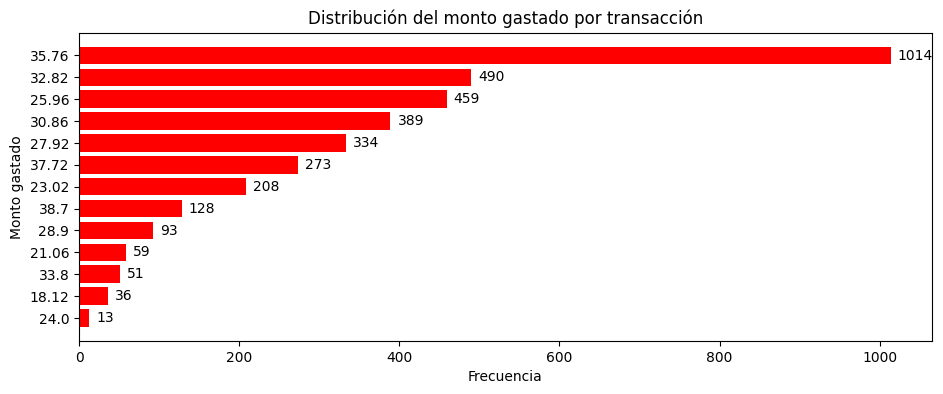

In [21]:
#Gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(11, 4))

# Usamos índice como etiquetas y la columna 'Frecuencia' para los valores
bars = ax.barh(tabla_frecuencia_df.index.astype(str), tabla_frecuencia_df['Frecuencia'], color='red')

# Agregar etiquetas con los valores al final de cada barra
ax.bar_label(bars, padding=5)

ax.set_title('Distribución del monto gastado por transacción')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Monto gastado')

# Invertir eje Y para que la barra más alta quede arriba
ax.invert_yaxis()

plt.show()

**¿Cuántas transacciones se realizaron en cada momento del día?**

In [28]:
# Contar la cantidad absoluta de cada método de pago en la columna 'Time_of_Day
counts = df_coffe['Time_of_Day'].value_counts().rename('Cantidad')

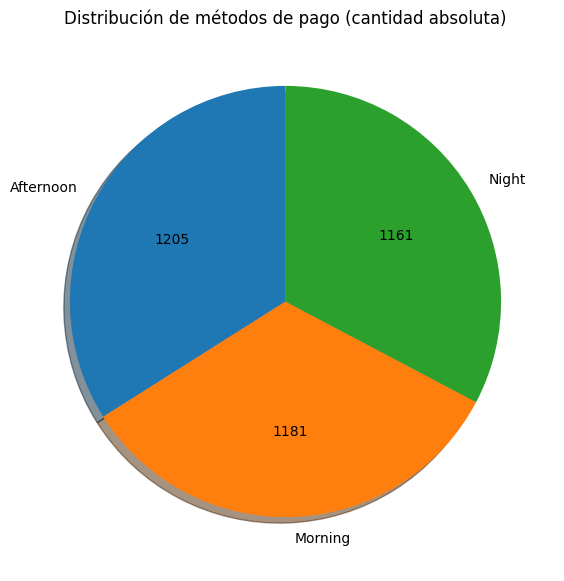

In [29]:
# Extraer las etiquetas (categorías) y los tamaños (cantidades) para el gráfico
labels = counts.index
sizes = counts.values

# Función que convierte el porcentaje en valor absoluto para mostrar en las etiquetas
def absolute_value(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute}"

# Crear figura y eje con tamaño personalizado
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, labels=labels, autopct=lambda pct: absolute_value(pct, sizes), startangle=90, shadow=True)
ax.set_title('Distribución de métodos de pago (cantidad absoluta)')
plt.show()

**¿Qué día de la semana tiene mayor y menor número de ventas y monto total?**

In [32]:
# Contar número de ventas por día y sumar el monto total por día
ventas_por_dia = df_coffe.groupby('Weekday').agg(
    ventas_totales=pd.NamedAgg(column='money', aggfunc='count'),
    monto_total=pd.NamedAgg(column='money', aggfunc='sum')
).reset_index()
ventas_por_dia

,Weekday,ventas_totales,monto_total
0,Fri,532,16802.66
1,Mon,544,17363.10
2,Sat,470,14733.52
3,Sun,419,13336.06
4,Thu,510,16091.40
5,Tue,572,18168.38
6,Wed,500,15750.46


In [33]:
# Encontrar el día con mayor y menor número de ventas
mayor_ventas = ventas_por_dia.loc[ventas_por_dia['ventas_totales'].idxmax()]
menor_ventas = ventas_por_dia.loc[ventas_por_dia['monto_total'].idxmin()]


print("Mayor número de ventas:")
print(mayor_ventas)
print("\nMenor número de ventas:")
print(menor_ventas)


Mayor número de ventas:
Weekday                Tue
ventas_totales         572
monto_total       18168.38
Name: 5, dtype: object

Menor número de ventas:
Weekday                Sun
ventas_totales         419
monto_total       13336.06
Name: 3, dtype: object


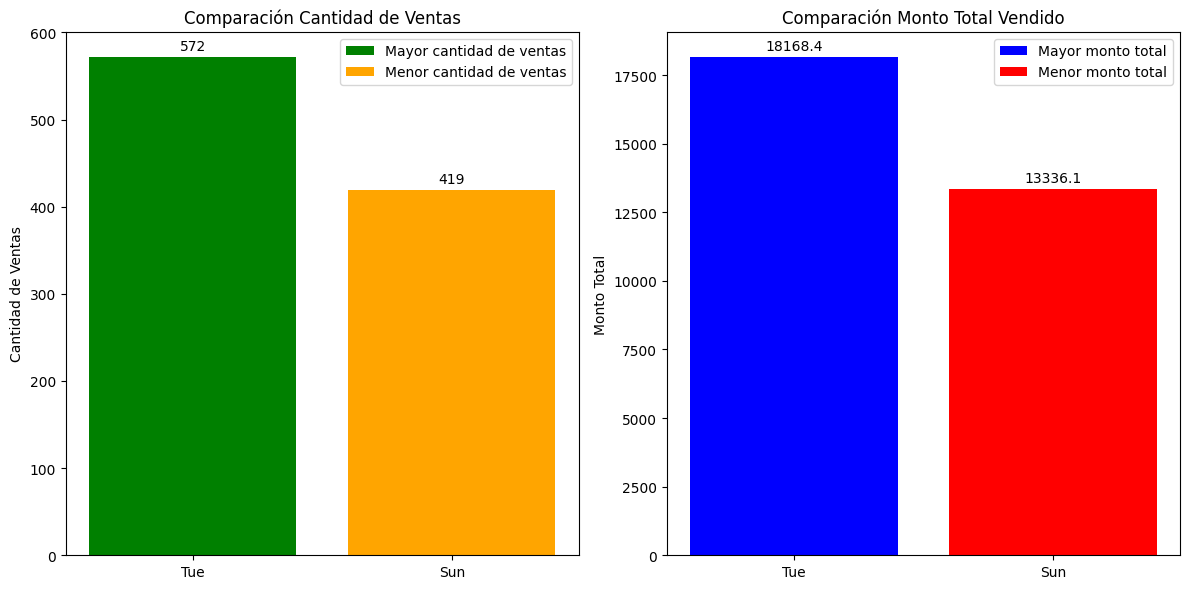

In [34]:
# Datos para cantidad de ventas
dias_cantidad = [mayor_ventas['Weekday'], menor_ventas['Weekday']]
cantidades = [mayor_ventas['ventas_totales'], menor_ventas['ventas_totales']]
colores_cantidad = ['green', 'orange']

# Datos para monto total
dias_monto = [mayor_ventas['Weekday'], menor_ventas['Weekday']]
montos = [mayor_ventas['monto_total'], menor_ventas['monto_total']]
colores_monto = ['blue', 'red']

# Crear figura y ejes para 2 gráficos al costado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico cantidad de ventas
bars1_1 = ax1.bar(dias_cantidad[0], cantidades[0], color=colores_cantidad[0], label='Mayor cantidad de ventas')
bars1_2 = ax1.bar(dias_cantidad[1], cantidades[1], color=colores_cantidad[1], label='Menor cantidad de ventas')
ax1.set_title('Comparación Cantidad de Ventas')
ax1.set_ylabel('Cantidad de Ventas')
ax1.legend()
ax1.bar_label(bars1_1, padding=3)
ax1.bar_label(bars1_2, padding=3)

# Gráfico monto total vendido
bars2_1 = ax2.bar(dias_monto[0], montos[0], color=colores_monto[0], label='Mayor monto total')
bars2_2 = ax2.bar(dias_monto[1], montos[1], color=colores_monto[1], label='Menor monto total')
ax2.set_title('Comparación Monto Total Vendido')
ax2.set_ylabel('Monto Total')
ax2.legend()
ax2.bar_label(bars2_1, padding=3)
ax2.bar_label(bars2_2, padding=3)

plt.tight_layout()
plt.show()

**¿Cómo varían las ventas mensualmente?**

In [36]:
# Convertir la columna 'Date' a datetime.
df_coffe['Date'] = pd.to_datetime(df_coffe['Date'])

# Crear una nueva serie con solo año y mes en formato 'YYYY-MM'
meses = df_coffe['Date'].dt.to_period('M').astype(str)

# Aplicar value_counts para contar ocurrencias por mes
conteo_meses = meses.value_counts().sort_index()

conteo_meses.head()

,count
Date,
2024-03,175
2024-04,168
2024-05,241
2024-06,223
2024-07,237


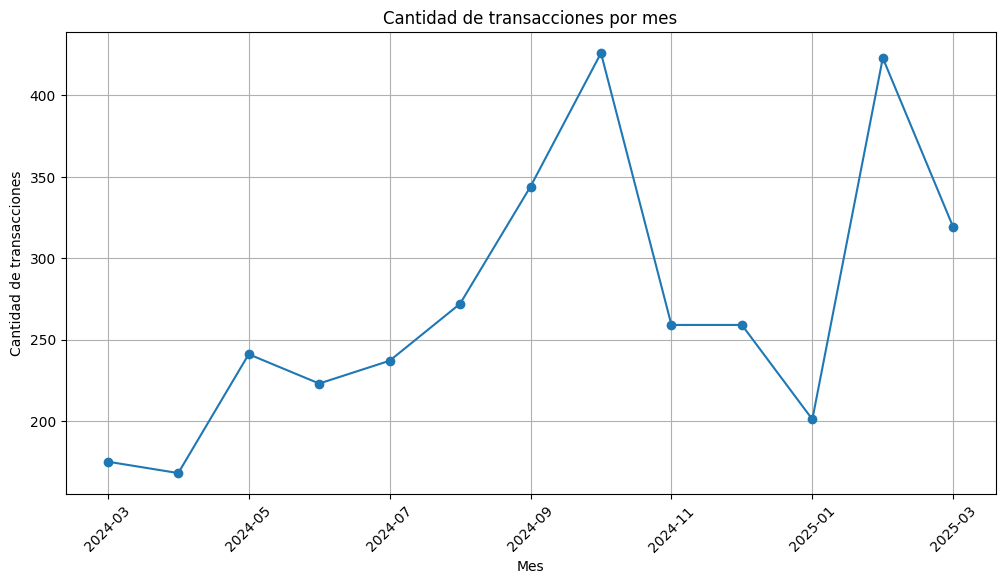

In [39]:
# Gráfico lineal
plt.figure(figsize=(12, 6))
conteo_meses.plot(kind='line', marker='o')
plt.title('Cantidad de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de transacciones')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()